In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Objective

The objective of this notebook is to find out why balancing is necessary in an unbalanced dataset. First we will see the accuracy without balancing the data and later we will do same with the balanced data and compare the accuracy. 

# Let's Not Balance

Loading the data.

In [2]:
df =pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Majority and Minority Classes

Let's check how imbalanced the data is. 

In [3]:
data_count = df['Class'].value_counts()
print(data_count)

0    284315
1       492
Name: Class, dtype: int64


Fraud transaction is represented as 1 and actual as 0. We see that the data is highly imbalanced. Out of whole data, only 492 (0.1730%) are fraud transactions. This is what we call a minority class. The legit transactions are the majority class. 

Split the training and test data set. 

In [4]:
inputs = df.drop("Class", axis="columns")
targets = df.Class
x_train, x_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.2, random_state=10)

Fit the model and check the accuracy. 

In [5]:
clf = LogisticRegression(max_iter = 10000).fit(x_train,y_train)
y_predicted = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9988588883817282


# Confusion Matrix

We got 99.8% accuracy without doing any balancing. Why is it then necessary to balance ? That will be answered by a confusion matrix. 

In [6]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[56839    29]
 [   36    58]]


Let's see it better with matplotlib and seaborn. 

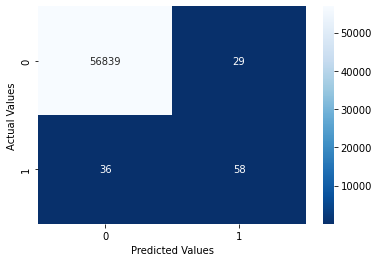

In [7]:
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

That's better. Here we see that 36 of fraud transactions (out of 94) have been classified as legit (False Negative). But only 29 of legit transactions (out of 56868) have been classified as fraud(False positive).
Or in other words,only 58 fraud transactions(out of 94, which makes it 61.7%) were accurately classified as fraud. But 56839 legit transactions (out of 56868, which makes it 99.94%) were accurately classified as legit.  
Which means that our model is doing well to predict the legit transactions but not so well to predict the fraud transactions. Which means that 99.8% accuracy is pretty much the accuracy to predict legit transactions, not fraud. But that's not what we are trying to achieve.  

# Balancing with Undersampling

We will balance the data by undersampling the legit transactions in the training dataset. We will not balance the test data. The imbalance must be preserved in the test set because the real world data is imbalanced. It doesn't make sense to test on the balanced data if we are eventually going to use the model for real world imbalanced data. 

First, we will recreate the training data from x_train and y_train to separate legit and fraud transactions. 

In [8]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245582,152815.0,-3.678592,-2.185288,2.145642,-0.108133,5.326785,-3.320732,-4.715889,-0.676015,1.203082,...,0.281099,-1.687634,-5.947433,0.991956,-0.871129,-0.674865,0.526634,0.318034,24.99,0
33921,37440.0,1.289134,0.467212,-1.035215,0.348510,0.965128,0.162317,0.188477,0.053558,-0.333772,...,-0.147832,-0.362923,-0.230544,-1.427948,0.650917,0.465196,-0.022903,0.009328,0.76,0
18808,29784.0,0.824080,-1.197571,1.671425,0.999394,-1.540596,1.480644,-1.451232,0.713797,1.952104,...,0.162967,0.668738,-0.229503,-0.232408,0.256959,0.741650,0.042034,0.029245,125.00,0
52806,45653.0,-0.763642,1.153200,0.845734,-0.287226,-0.005743,-0.137666,0.255488,0.578325,-0.713008,...,-0.183093,-0.678964,-0.037631,-0.529925,-0.096189,0.108287,0.126774,0.039826,19.98,0
200909,133638.0,1.986009,-0.337558,-0.418934,0.369815,-0.360600,-0.012716,-0.588175,-0.005277,1.276081,...,0.199920,0.863473,0.130956,0.660961,-0.034146,-0.240472,0.047897,-0.028392,9.99,0


Separate legit and fraud transactions. 

In [9]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]

Check how many frauds we got so that we can undersample legit transactions to that number.

In [10]:
print(legit_train.shape, fraud_train.shape)

(227447, 31) (398, 31)


# Random Undersampling

So, we see that there are 227447 legit transactions and 398 fraud transactions in our training data set. We will balance this dataset by randomly selecting 398 legit transactions out of 227447. This is called random undersampling. 

In [11]:
legit_train = legit_train.sample(n=398)
legit_train.shape

(398, 31)

Now that we have same number of fraud and legit transactions, let's join them back to recreate a complete balanced training dataset. 

In [12]:
train_data = pd.concat([legit_train, fraud_train], axis=0)
train_data.shape

(796, 31)

Now, let's separate features and targets from the new training dataset. 

In [13]:
x_train_new = train_data.drop('Class', axis='columns')
y_train_new = train_data.Class

We don't have to bother with the test dataset because it will stay the same. So, we will just fit the model with new x_train_new, y_train_new and old x_test, y_test.

In [14]:
clf = LogisticRegression(max_iter=10000).fit(x_train_new, y_train_new)
y_predicted = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9353779712790984


We got an accuracy of 96.32%. Not bad. Let's check the confusion matrix. 

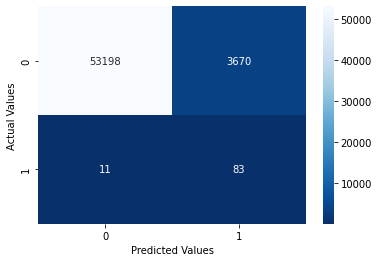

In [15]:
cm = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

From the confusion matrix, we see that 85 fraud transactions (out of 94, which makes it 90.4% ) were accurately classified as fraud. And 54781 legit transactions (out of 56868, which makes it 96.3%) were accurately classified as legit. 
Only 9 fraud transactions were classified as legit transactions. This result shows that even though we got less accuracy, this model is better at predicting the fraud transactions. 

# Conclusion

In real world, most of the data are always imbalanced. For example, google ads click through rate, faulty products in an assembly line, spam emails etc. If we don't do anything in such unbalanced dataset, the model tends to be biased towards majority class, whatever that is. And that is a problem because we are trying to predict the minority class, not the majority. So, the biasness of the model towards majority class must be addressed. We do this by undersampling the majority class (decreasing the size of majority class) or oversampling the minority class (increasing the size of minority class).      

From above results, we see that even though we get high accuracy without balancing, that accuracy shows how great it is at predicting legit transactions and how bad it is at predicting fraud transactions. But we always need to predict the fraud transactions or spams or faulty products which are always a minority in these kinds of dataset. 

And that is why balancing is necessary. 